For Oil_and_Energy Tickers


In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import datetime
import os
oe_tickers = {
    "ExxonMobil": "XOM",
    "Chevron Corporation": "CVX",
    "ConocoPhillips": "COP",
    "Occidental Petroleum Corporation": "OXY",
    "Marathon Oil Corporation": "MRO",
    "Devon Energy Corporation": "DVN",
    "EOG Resources, Inc.": "EOG",
    "Hess Corporation": "HES",
    "Pioneer Natural Resources Company": "PXD",
    "Valero Energy Corporation": "VLO"
}

e_date = datetime.datetime.today()
s_date = e_date - datetime.timedelta(days=365*10)
output_dir = "/content/stock_data"
os.makedirs(output_dir, exist_ok=True)

for company, ticker in oe_tickers.items():
    data = yf.download(ticker, start=s_date, end=e_date)
    filename = f"{output_dir}/{company}_stock_data.csv"
    data.to_csv(filename)
    print(f"Data for {company} saved at {filename}.")

print("done")


OSError: [Errno 30] Read-only file system: '/content'

In [ ]:
import os
import zipfile

# Path where the files are stored
output_dir = "/content/stock_data"

# Create a Zip file
zip_path = "/content/stock_data.zip"
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for filename in os.listdir(output_dir):
        file_path = os.path.join(output_dir, filename)
        zipf.write(file_path, os.path.basename(file_path))

# Download the zip file
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pandas statsmodels


In [ ]:
import pandas as pd
import os

dataframes = {}
output_dir = "/content/stock_data"  # Path to your CSV files

for filename in os.listdir(output_dir):
    if filename.endswith(".csv"):
        company_name = filename.split('_')[0]  # Assumes format is Company_stock_data.csv
        df = pd.read_csv(os.path.join(output_dir, filename), usecols=['Date', 'Close'])
        df['Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime object
        dataframes[company_name] = df.set_index('Date')

print("Data loaded into dataframes.")


Data loaded into dataframes.


Dickey-Fuller Tests for All the Combinations

In [ ]:
from statsmodels.tsa.stattools import adfuller
import itertools
results = {}
pairs = list(itertools.combinations(dataframes.keys(), 2)  # Create all possible pairs
for company1, company2 in pairs:
    series1 = dataframes[company1]['Close']
    series2 = dataframes[company2]['Close']
    result1 = adfuller(series1.dropna(), autolag='AIC')
    result2 = adfuller(series2.dropna(), autolag='AIC')
    results[(company1, company2)] = {
        f"ADF Statistic {company1}": result1[0],
        f"p-value {company1}": result1[1],
        f"ADF Statistic {company2}": result2[0],
        f"p-value {company2}": result2[1]
    }
for pair, res in results.items():
    print(f"Results for {pair}:\n{res}\n")


Results for ('EOG Resources, Inc.', 'Occidental Petroleum Corporation'):
{'ADF Statistic EOG Resources, Inc.': -1.9006876696072226, 'p-value EOG Resources, Inc.': 0.331737678416013, 'ADF Statistic Occidental Petroleum Corporation': -1.7753749504324319, 'p-value Occidental Petroleum Corporation': 0.39275404770355327}

Results for ('EOG Resources, Inc.', 'Chevron Corporation'):
{'ADF Statistic EOG Resources, Inc.': -1.9006876696072226, 'p-value EOG Resources, Inc.': 0.331737678416013, 'ADF Statistic Chevron Corporation': -1.3009643438502807, 'p-value Chevron Corporation': 0.6287310097873975}

Results for ('EOG Resources, Inc.', 'Marathon Oil Corporation'):
{'ADF Statistic EOG Resources, Inc.': -1.9006876696072226, 'p-value EOG Resources, Inc.': 0.331737678416013, 'ADF Statistic Marathon Oil Corporation': -1.9662895078185572, 'p-value Marathon Oil Corporation': 0.3015466972046812}

Results for ('EOG Resources, Inc.', 'ConocoPhillips'):
{'ADF Statistic EOG Resources, Inc.': -1.900687669607

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
from itertools import combinations

In [ ]:
import os
def perform_var_analysis(df1, df2):
    df1.index = pd.DatetimeIndex(df1.index).to_period('D')
    df2.index = pd.DatetimeIndex(df2.index).to_period('D')
    combined_df = pd.concat([df1, df2], axis=1)
    model = VAR(combined_df.dropna())
    results = model.fit(maxlags=15, ic='aic')
    return results.summary()


dataframes = {}
output_dir = "/content/stock_data"
for filename in os.listdir(output_dir):
    if filename.endswith(".csv"):
        company_name = filename.split('_')[0]
        df = pd.read_csv(os.path.join(output_dir, filename), usecols=['Date', 'Close'])
        df['Date'] = pd.to_datetime(df['Date'])
        dataframes[company_name] = df.set_index('Date')
company_pairs = list(itertools.combinations(dataframes.keys(), 2))
var_results = {}
for company1, company2 in company_pairs:
    print(f"Analyzing pair: {company1}, {company2}")
    df1 = dataframes[company1].copy()
    df2 = dataframes[company2].copy()
    var_summary = perform_var_analysis(df1, df2)
    var_results[(company1, company2)] = var_summary



Analyzing pair: EOG Resources, Inc., Occidental Petroleum Corporation
Analyzing pair: EOG Resources, Inc., Chevron Corporation
Analyzing pair: EOG Resources, Inc., Marathon Oil Corporation
Analyzing pair: EOG Resources, Inc., ConocoPhillips
Analyzing pair: EOG Resources, Inc., Valero Energy Corporation
Analyzing pair: EOG Resources, Inc., ExxonMobil
Analyzing pair: EOG Resources, Inc., Hess Corporation
Analyzing pair: EOG Resources, Inc., Devon Energy Corporation
Analyzing pair: EOG Resources, Inc., Pioneer Natural Resources Company
Analyzing pair: Occidental Petroleum Corporation, Chevron Corporation
Analyzing pair: Occidental Petroleum Corporation, Marathon Oil Corporation
Analyzing pair: Occidental Petroleum Corporation, ConocoPhillips
Analyzing pair: Occidental Petroleum Corporation, Valero Energy Corporation
Analyzing pair: Occidental Petroleum Corporation, ExxonMobil
Analyzing pair: Occidental Petroleum Corporation, Hess Corporation
Analyzing pair: Occidental Petroleum Corporatio

In [ ]:
print(var_results)

{('EOG Resources, Inc.', 'Occidental Petroleum Corporation'):   Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Apr, 2024
Time:                     21:57:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.11846
Nobs:                     2513.00    HQIC:                   1.10960
Log likelihood:          -8513.45    FPE:                    3.01786
AIC:                      1.10455    Det(Omega_mle):         3.01066
--------------------------------------------------------------------
Results for equation Close
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.338050         0.174584            1.936           0.053
L1.Close         0.996910         0.002370          420.724           0.000
L1.Close        -0

## Creating the Pair Trading Strategy Taught in Class


In [1]:
import pandas as pd
import os

path = "/Users/caleb/Library/CloudStorage/OneDrive-Personal/文档/Curriculum/NYU Y1S2/Robo/project/proj1.csv"

In [2]:
all_stock_price = pd.read_csv(path)
all_stock_price.head()

# price time series data imputation
all_stock_price["PRC"] = all_stock_price.groupby('PERMNO')["PRC"].transform(lambda x: x.fillna(x.mean()))


import datetime

all_stock_price['date'] = pd.to_datetime(all_stock_price['date'])
cutoff_date = pd.to_datetime('2020-01-01')

price_test = all_stock_price.loc[all_stock_price['date'] >= cutoff_date]
price_train = all_stock_price.loc[all_stock_price['date'] < cutoff_date]

/var/folders/ns/t6s7rdfx5dv4t9gqq57nmf1r0000gn/T/ipykernel_54951/2740972116.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  all_stock_price = pd.read_csv(path)


In [99]:
all_stock_price.groupby('PERMNO').size().value_counts()

1259    414
421       2
797       2
126       2
20        2
       ... 
1009      1
692       1
717       1
1071      1
1164      1
Name: count, Length: 89, dtype: int64

In [32]:
sample_pair_HDBSCAN_CORRELATION=((25081, 35554), (35554, 42906), (11674, 23229), (11674, 23931), (11674, 24985), (23229, 23536), (23229, 23931), (23229, 24010), (23229, 24109), (23229, 24205), (23229, 24985), (23229, 44206), (23536, 23931), (23536, 24010), (23536, 24109), (23536, 44206), (23931, 24010), (23931, 24109), (23931, 24205), (23931, 24985), (23931, 44206), (24010, 24109), (24010, 44206), (24109, 24985), (24109, 44206), (24205, 24985))
sample_pair_HDBSCAN_COINTEGRATION=([23229, 24109],
 [23931, 44206],
 [23536, 24010],
 [27959, 38762],
 [23229, 44206],
 [23931, 24109],
 [24109, 44206],
 [23536, 44206],
 [11404, 38762],
 [21776, 23712],
 [21792, 27991])
sample_pair_DBSCAN_COINTEGRATION=([42906, 58246],
 [35554, 58246],
 [17830, 22103],
 [12062, 22103],
 [35554, 42906],
 [34746, 58246],
 [28222, 49680],
 [22752, 26403],
 [64311, 64390],
 [48725, 64311],
 [41080, 58683])

sample_pair_OPTICS_Cointegration = ([23229, 24109], [35554, 42906], [23931, 24109], [10145, 14008])
sample_pair_OPTICS_Correlation = [(35554, 42906),
(42906, 60442),
(23229, 23536),
(23229, 23931),
(23229, 24109),
(23229, 24205),
(23229, 24985),
(23536, 23931),
(23536, 24109),
(23931, 24109),
(23931, 24205),
(23931, 24985),
(24109, 24985),
(24205, 24985)]

In [6]:
import pandas as pd
import numpy as np
import os
from itertools import combinations

# Define helper functions
def calculate_returns(df, days):
    """Calculate percentage returns over specified number of days."""
    return df['PRC'].pct_change(days)

def calculate_z_scores(df):
    """Calculate rolling z-scores of returns over specified window."""
    return df / df.rolling(window=60).std().shift(1) # the logic of better version solution
    # return (df - df.rolling(window=days+60).mean()) / df.rolling(window=days+60).std()

def calculate_volatility(df):
    """Calculate rolling standard deviation of returns over 20 days."""
    return df['ret1'].rolling(window=20).std()

# Constants
LongEntryThreshold = -1
ShortEntryThreshold = 1
LongCap = 1
ShortCap = -1

In [21]:
import pandas as pd
import numpy as np

def calculate_age_and_position(row, previous_row, hold_period, days):
    if previous_row is None:
        previous_position = 0
        previous_age = 0
    else:
        previous_position = previous_row[f'position{days}']
        previous_age = previous_row[f'age{days}']

    if (
        (previous_position == 0 and row[f'signal{days}'] != 0) or
        (previous_position * row[f'signal{days}'] == -1) or
        (previous_age >= hold_period and row[f'signal{days}'] != 0)
    ):
        age = 1
        position = row[f'signal{days}']
    elif (
        (row[f'signal{days}'] == 0 and previous_position == 0) or
        (row[f'LCap{days}'] or row[f'SCap{days}']) or
        (previous_age >= hold_period)
    ):
        age = 0
        position = 0
    else:
        age = previous_age + 1
        position = previous_position

    return age, position

def generate_age_and_position_columns(df):
    for days, zdiff, hold_period in [('5', 'zdiff5', 5), ('10', 'zdiff10', 10), ('20', 'zdiff20', 20)]:
        df[[f'age{days}', f'position{days}']] = df.apply(
            lambda x: pd.Series(calculate_age_and_position(x, None, hold_period, days)), axis=1
        )

        for i in range(1, len(df)):
            df.loc[i, [f'age{days}', f'position{days}']] = calculate_age_and_position(
                df.iloc[i], df.iloc[i-1], hold_period, days
            )

    return df

def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns / peak) - 1
    max_drawdown = drawdown.min()
    return max_drawdown

def calculate_sortino_ratio(returns, risk_free_rate=0, target_return=0):
    downside_returns = returns[returns < target_return]
    downside_deviation = np.std(downside_returns)
    excess_return = np.mean(returns) - risk_free_rate
    sortino_ratio = np.sqrt(252) * excess_return / downside_deviation
    return sortino_ratio

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    excess_return = returns - risk_free_rate
    sharpe_ratio = np.sqrt(252) * np.mean(excess_return) / np.std(excess_return)
    return sharpe_ratio

def calculate_alpha_beta(returns, benchmark_returns):
    ret_df = pd.DataFrame({'returns': returns, 'benchmark_returns': benchmark_returns})
    covariance = ret_df.cov().iloc[0, 1]
    benchmark_variance = ret_df['benchmark_returns'].var()
    beta = covariance / benchmark_variance
    alpha = np.mean(returns) - beta * np.mean(benchmark_returns)
    return alpha, beta


def calculate_metrics(merged_df, company1, company2):
    merged_df["ComboRet"] = (merged_df['fret_z5'] + merged_df['fret_z10'] + merged_df['fret_z20']) / 3
    sharpe_ratio = calculate_sharpe_ratio(merged_df["ComboRet"])
    sortino_ratio = calculate_sortino_ratio(merged_df["ComboRet"])
    maximum_drawdown = calculate_max_drawdown(merged_df["ComboRet"])
    
    # Calculate the percentage of time the strategy has a position
    position_threshold = 0  # Adjust this value according to your position criteria
    merged_df["Position"] = (merged_df["ComboRet"].abs() > position_threshold).astype(int)
    pct_time_in_position = merged_df["Position"].mean() 
    
    metrics_df = pd.DataFrame({
        'Company1': [company1],
        'Company2': [company2],
        'Sharpe Ratio': [sharpe_ratio],
        'Sortino Ratio': [sortino_ratio],
        'Maximum Drawdown': [maximum_drawdown],
        'Percentage of Time in Position': [pct_time_in_position]
    })
    
    return metrics_df

In [8]:
# Set directories
input_dir = "/content/stock_data"
output_dir = "/Users/caleb/Library/CloudStorage/OneDrive-Personal/文档/Curriculum/NYU Y1S2/Robo/project/content"
os.makedirs(output_dir, exist_ok=True)

# Load CSV files into DataFrames
# dataframes = {filename.split('_')[0]: pd.read_csv(os.path.join(input_dir, filename), parse_dates=['Date'], index_col='Date')
#               for filename in os.listdir(input_dir) if filename.endswith(".csv")}

In [12]:
all_stock_price.loc[(all_stock_price.PERMNO==79323)&(all_stock_price['date']>'20200101'),"date"]

409253   2020-01-02
409254   2020-01-03
409255   2020-01-06
409256   2020-01-07
409257   2020-01-08
            ...    
409501   2020-12-24
409502   2020-12-28
409503   2020-12-29
409504   2020-12-30
409505   2020-12-31
Name: date, Length: 253, dtype: datetime64[ns]

In [ ]:
metrics_dfs = []



# Process each pair of companies
for pair in sample_pair:
    df1 = all_stock_price.loc[all_stock_price.PERMNO==pair[0],["PRC",'date']].reset_index(drop=True)
    df2 = all_stock_price.loc[all_stock_price.PERMNO==pair[1],["PRC",'date']].reset_index(drop=True)

    company1 = all_stock_price.loc[all_stock_price.PERMNO==pair[0],"TICKER"].iloc[0]
    company2 = all_stock_price.loc[all_stock_price.PERMNO==pair[1],"TICKER"].iloc[0]

    # Calculate returns, z-scores, and volatility for both companies
    for days in [1, 5, 10, 20]:
        df1[f'ret{days}'] = calculate_returns(df1[["PRC"]], days)
        df2[f'ret{days}'] = calculate_returns(df2[["PRC"]], days)
        if days > 1:
            df1[f'z{days}'] = calculate_z_scores(df1[f'ret{days}'])
            df2[f'z{days}'] = calculate_z_scores(df2[f'ret{days}'])

    df1['vol20'] = calculate_volatility(df1)
    df2['vol20'] = calculate_volatility(df2)

    # Merge dataframes
    merged_df = pd.merge(df1,df2,on='date', how='outer')


    # Trading signals and position management
    for days, zdiff, hold_period in [('5', 'zdiff5', 5), ('10', 'zdiff10', 10), ('20', 'zdiff20', 20)]:
        merged_df[zdiff] = merged_df[f'z{days}_x'] - merged_df[f'z{days}_y']

        merged_df[f'signal{days}'] = np.where(merged_df[zdiff] < LongEntryThreshold, 1,
                                               np.where(merged_df[zdiff] > ShortEntryThreshold, -1, 0))

        merged_df[f'LCap{days}'] = np.where((merged_df[f'signal{days}'].shift(1) == 1) & (merged_df[zdiff] > LongCap), 1, 0)
        merged_df[f'SCap{days}'] = np.where((merged_df[f'signal{days}'].shift(1) == -1) & (merged_df[zdiff] < ShortCap), 1, 0)
    
    merged_df = generate_age_and_position_columns(merged_df)


    for days, zdiff, hold_period in [('5', 'zdiff5', 5), ('10', 'zdiff10', 10), ('20', 'zdiff20', 20)]:

        # merged_df[f'age{days}'] = (merged_df[f'signal{days}'] != 0).astype(int).cumsum()
        # merged_df[f'aged{days}?'] = (merged_df[f'age{days}'] == hold_period).astype(int)

        # position should be 
        # merged_df[f'position{days}'] = np.where(merged_df[f'aged{days}?'] == 1, 0, merged_df[f'signal{days}'])
        merged_df[f'fret_z{days}'] = merged_df[f'position{days}'] * merged_df[f'ret1_x'].shift(-1) - merged_df[f'position{days}'] * merged_df[f'ret1_y'].shift(-1)

    merged_df["ComboRet"] = (merged_df['fret_z5']+merged_df['fret_z10']+merged_df['fret_z20'])/3 
    
    metrics_df = calculate_metrics(merged_df, company1, company2)

    metrics_dfs.append(metrics_df)
    
    # Save the results to CSV
    merged_df.to_csv(os.path.join(output_dir, f'{company1}_{company2}_processed.csv'))
print("All processing complete. Data saved in 'processed_data' directory.")

all_metrics_df = pd.concat(metrics_dfs, ignore_index=True)


In [10]:
# # explore the size of price time series of each stock

# for pair in sample_pair:
#     df1 = all_stock_price.loc[all_stock_price.PERMNO==pair[0],["PRC",'date']].reset_index(drop=True)
#     df2 = all_stock_price.loc[all_stock_price.PERMNO==pair[1],["PRC",'date']].reset_index(drop=True)
#     print(df1.shape,df2.shape)

In [64]:
from sklearn import preprocessing

def hw_model(all_stock_price, sample_pair):
  metrics_dfs = []

  # Process each pair of companies
  for pair in sample_pair:
      df1 = all_stock_price.loc[all_stock_price.PERMNO==pair[0],["PRC",'date']].reset_index(drop=True)
      df2 = all_stock_price.loc[all_stock_price.PERMNO==pair[1],["PRC",'date']].reset_index(drop=True)
        


      company1 = all_stock_price.loc[all_stock_price.PERMNO==pair[0],"PERMNO"].iloc[0]
      company2 = all_stock_price.loc[all_stock_price.PERMNO==pair[1],"PERMNO"].iloc[0]

      # Calculate returns, z-scores, and volatility for both companies
      for days in [1, 5, 10, 20]:
          df1[f'ret{days}'] = calculate_returns(df1[["PRC"]], days)
          df2[f'ret{days}'] = calculate_returns(df2[["PRC"]], days)
          if days > 1:
              df1[f'z{days}'] = calculate_z_scores(df1[f'ret{days}'])
              df2[f'z{days}'] = calculate_z_scores(df2[f'ret{days}'])

      df1['vol20'] = calculate_volatility(df1)
      df2['vol20'] = calculate_volatility(df2)

      # Merge dataframes
      merged_df = pd.merge(df1,df2,on='date', how='outer')


      # Trading signals and position management
      for days, zdiff, hold_period in [('5', 'zdiff5', 5), ('10', 'zdiff10', 10), ('20', 'zdiff20', 20)]:
          merged_df[zdiff] = merged_df[f'z{days}_x'] - merged_df[f'z{days}_y']

          merged_df[f'signal{days}'] = np.where(merged_df[zdiff] < LongEntryThreshold, 1,
                                                np.where(merged_df[zdiff] > ShortEntryThreshold, -1, 0))

          merged_df[f'LCap{days}'] = np.where((merged_df[f'signal{days}'].shift(1) == 1) & (merged_df[zdiff] > LongCap), 1, 0)
          merged_df[f'SCap{days}'] = np.where((merged_df[f'signal{days}'].shift(1) == -1) & (merged_df[zdiff] < ShortCap), 1, 0)

      merged_df = generate_age_and_position_columns(merged_df)


      for days, zdiff, hold_period in [('5', 'zdiff5', 5), ('10', 'zdiff10', 10), ('20', 'zdiff20', 20)]:

          # merged_df[f'age{days}'] = (merged_df[f'signal{days}'] != 0).astype(int).cumsum()
          # merged_df[f'aged{days}?'] = (merged_df[f'age{days}'] == hold_period).astype(int)

          # position should be
          # merged_df[f'position{days}'] = np.where(merged_df[f'aged{days}?'] == 1, 0, merged_df[f'signal{days}'])
          merged_df[f'fret_z{days}'] = merged_df[f'position{days}'] * merged_df[f'ret1_x'].shift(-1) - merged_df[f'position{days}'] * merged_df[f'ret1_y'].shift(-1)

      merged_df["ComboRet"] = (merged_df['fret_z5']+merged_df['fret_z10']+merged_df['fret_z20'])/3

      metrics_df = calculate_metrics(merged_df, company1, company2)

      metrics_dfs.append(metrics_df)

      # Save the results to CSV
      # merged_df.to_csv(os.path.join(output_dir, f'{company1}_{company2}_processed.csv'))
  print("All processing complete. Data saved in 'processed_data' directory.")

  all_metrics_df = pd.concat(metrics_dfs, ignore_index=True)
  return all_metrics_df

In [53]:
data = {
    'OPTICS_Cointegration': [
        [23229, 24109],
        [35554, 42906],
        [23931, 24109],
        [10145, 14008]
    ],
    'OPTICS_Correlation': [
        (35554, 42906), (42906, 60442), (23229, 23536), (23229, 23931),
        (23229, 24109), (23229, 24205), (23229, 24985), (23536, 23931),
        (23536, 24109), (23931, 24109), (23931, 24205), (23931, 24985),
        (24109, 24985), (24205, 24985)
    ],
    'HDBSCAN_Correlation': [
        (11674, 23229), (11674, 23931), (11674, 24985), (23229, 23536),
        (23229, 23931), (23229, 24010), (23229, 24109), (23229, 24205),
        (23229, 24985), (23229, 44206), (23536, 23931), (23536, 24010),
        (23536, 24109), (23536, 44206), (23931, 24010), (23931, 24109),
        (23931, 24205), (23931, 24985), (23931, 44206), (24010, 24109),
        (24010, 44206), (24109, 24985), (24109, 44206), (24205, 24985)
    ],
    'HDBSCAN_Cointegration': [
        [23229, 24109], [23931, 44206], [23536, 24010], [27959, 38762],
        [23229, 44206], [23931, 24109], [24109, 44206], [23536, 44206],
        [11404, 38762], [21776, 23712], [21792, 27991]
    ],
    'DBSCAN_Cointegration': [
        [42906, 58246], [25953, 56573], [23229, 24109], [58246, 71563],
        [35554, 58246], [23931, 44206], [54148, 77661], [71563, 81055],
        [70519, 79323], [60442, 70519], [23536, 24010], [62308, 79323],
        [35554, 42906], [34746, 58246], [42906, 81055], [27959, 38762],
        [58246, 81055], [64995, 69032], [23229, 44206], [23931, 24109]
    ],
    'DBSCAN_Correlation': [
        (11674, 23229), (11674, 23931), (11674, 24985), (23229, 23536),
        (23229, 23931), (23229, 24010), (23229, 24109), (23229, 24205),
        (23229, 24985), (23229, 44206), (23536, 23931), (23536, 24010),
        (23536, 24109), (23536, 44206), (23931, 24010), (23931, 24109),
        (23931, 24205), (23931, 24985), (23931, 44206), (24010, 24109),
        (24010, 44206), (24109, 24985), (24109, 44206), (24205, 24985),
        (25081, 35044), (25081, 35554), (34746, 35044), (34746, 35554),
        (34746, 42906), (34746, 58246), (34746, 60442), (34746, 64995),
        (34746, 69032), (34746, 71563), (35044, 35554), (35044, 42906),
        (35044, 58246), (35044, 60442), (35044, 64995), (35044, 69032),
        (35044, 71563), (35554, 42906), (35554, 64995), (35554, 69032),
        (42906, 58246), (42906, 60442), (42906, 64995), (42906, 71563),
        (42906, 81055), (47896, 59408), (47896, 62308), (47896, 71563),
        (58246, 60442), (58246, 64995), (59408, 60442), (59408, 62308),
        (59408, 71563), (60442, 69032), (60442, 70519), (60442, 71563),
        (62308, 79323), (64995, 69032), (48725, 62148), (48725, 64311),
        (62148, 64311), (54148, 77661)
    ]
}

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_performance_distribution(df):
    # Melt the DataFrame to convert metrics into a single column
    melted_df = pd.melt(df, id_vars=['Company1', 'Company2'], var_name='Metric', value_name='Value')

    # Create a figure with subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the violin plot
    sns.violinplot(x='Metric', y='Value', data=melted_df, ax=ax)

    # Set plot title and labels
    ax.set_title('Distribution of Performance Metrics')
    ax.set_xlabel('Metric')
    ax.set_ylabel('Value')

    # Display the plot
    plt.tight_layout()
    plt.show()

    # Calculate summary statistics
    summary_stats = melted_df.groupby('Metric')['Value'].describe()

    return summary_stats

In [27]:
result_OI = hw_model(all_stock_price,sample_pair_OPTICS_Cointegration)
result_OC = hw_model(all_stock_price,sample_pair_OPTICS_Correlation)

All processing complete. Data saved in 'processed_data' directory.
All processing complete. Data saved in 'processed_data' directory.


In [51]:
def find_shared_elements(*lists):
    if len(lists) == 0:
        return []

    shared_elements = set(map(tuple, lists[0]))
    for lst in lists[1:]:
        shared_elements &= set(map(tuple, lst))

    return list(map(list, shared_elements))

O_shared = find_shared_elements(sample_pair_DBSCAN_COINTEGRATION,sample_pair_HDBSCAN_CORRELATION)

All processing complete. Data saved in 'processed_data' directory.


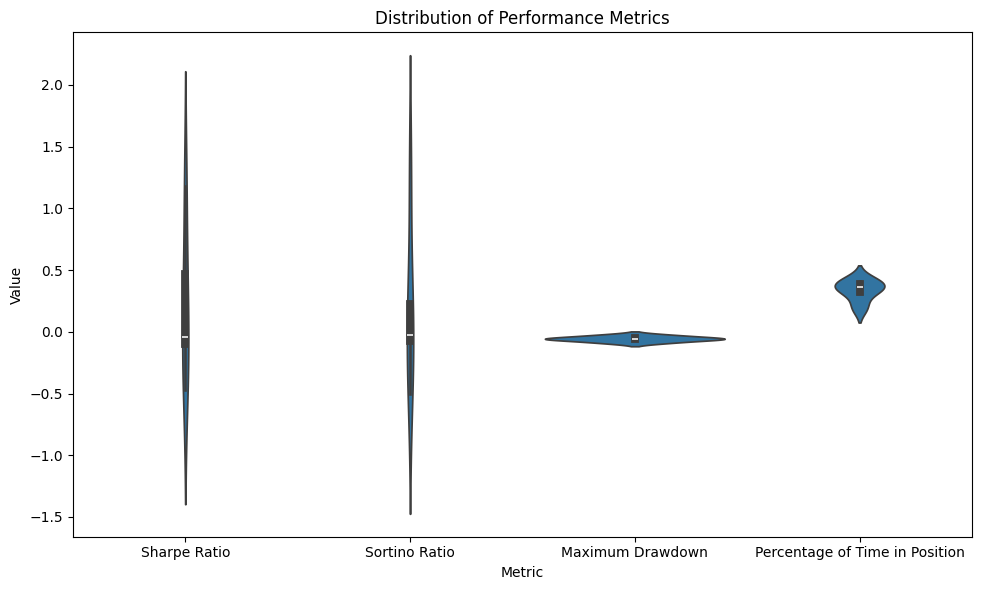

In [56]:
plot_performance_distribution(hw_model(price_test,O_shared)).to_clipboard()


In [63]:
filtered_pairs[['Company1', 'Company2']].values.tolist()

[['CMS', 'AEP'], ['MTB', 'HBAN']]

In [ ]:
# performance by filtering out bad pairs in trainset    
import pandas as pd

final_results = []

for algorithm in ['OPTICS', 'HDBSCAN', 'DBSCAN']:
    for relationship in ['Cointegration', 'Correlation']:
        key = f"{algorithm}_{relationship}"
        sample_pairs = data[key]
        
        # Call hw_model(price_train, sample_pairs) and filter by Sharpe Ratio > 0.3
        train_results = hw_model(price_train, sample_pairs)
        filtered_pairs = train_results[train_results['Sharpe Ratio'] > 0.5]
        
        if not filtered_pairs.empty:
            # Run plot_performance_distribution(hw_model(price_test, sample_pairs))
            test_results = plot_performance_distribution(hw_model(price_test, filtered_pairs[['Company1', 'Company2']].values.tolist()))
            
            # Melt the test_results dataframe to long format
            test_results_melted = pd.melt(test_results.reset_index(), id_vars=['Metric'], 
                                          value_vars=['count', 'mean', 'std'], 
                                          var_name='Statistic', value_name='Value')
            
            # Add Clustering and Test columns
            test_results_melted['Clustering'] = algorithm
            test_results_melted['Test'] = relationship
            
            final_results.append(test_results_melted)

# Concatenate the final results into a single dataframe
final_df = pd.concat(final_results, ignore_index=True)

# Pivot the final dataframe to the desired format
final_df_pivot = final_df.pivot_table(index=['Clustering', 'Test', 'Metric'], 
                                      columns='Statistic', values='Value', 
                                      aggfunc='first').reset_index()

print(final_df_pivot)

In [ ]:
final_df_pivot.to_clipboard()

In [72]:
# output the percentage of out of industry clusters

stock_info =pd.read_excel('proj3.xlsx')
def check_pairs(pair_list, stock_info):
    """
    Check if pairs in the list have the same 'Company Name' or 'North American Industry Classification System' value in the stock_info dataframe.

    Args:
        pair_list (list): A list of tuples, where each tuple contains two PERMNO values.
        stock_info (pandas.DataFrame): A DataFrame containing stock information with columns 'PERMNO', 'Company Name', and 'North American Industry Classification System'.

    Returns:
        pandas.DataFrame: A DataFrame with columns 'Pair', 'Same_Company_Name', and 'Same_NAICS'. 'Pair' contains the input tuple, 'Same_Company_Name' contains the common 'Company Name' if the pair has the same 'Company Name', otherwise None, and 'Same_NAICS' contains the common 'North American Industry Classification System' value if the pair has the same value, otherwise None.
    """
    result = []
    for pair in pair_list:
        permno1, permno2 = pair
        row1 = stock_info.loc[stock_info['PERMNO'] == permno1]
        row2 = stock_info.loc[stock_info['PERMNO'] == permno2]
        if not row1.empty and not row2.empty:
            company_name1 = row1['Company Name'].values[0]
            company_name2 = row2['Company Name'].values[0]
            naics1 = row1['North American Industry Classification System'].values[0]
            naics2 = row2['North American Industry Classification System'].values[0]
            same_company_name = company_name1 == company_name2
            same_naics = naics1 == naics2
            result.append({
                'Pair': pair,
                'Same_Company_Name': same_company_name,
                'Same_NAICS': naics1 if same_naics else None
            })
        else:
            print("error")
    result_df = pd.DataFrame(result)
    return result_df

def calculate_different_industry_percentage(result_df):
    """
    Calculate the percentage of pairs that are not in the same industry.

    Args:
        result_df (pandas.DataFrame): The DataFrame returned by the check_pairs function.

    Returns:
        float: The percentage of pairs that are not in the same industry.
    """
    total_pairs = len(result_df)
    different_industry_pairs = result_df['Same_NAICS'].isna().sum()
    percentage = (different_industry_pairs / total_pairs) * 100
    return percentage

def analyze_naics(result_df):
    """
    Analyze the 'Same_NAICS' column in the result DataFrame from check_pairs.

    Args:
        result_df (pandas.DataFrame): The DataFrame returned by the check_pairs function.

    Returns:
        tuple: A tuple containing:
            - The percentage of rows where 'Same_NAICS' is None
            - A pandas.Series with the value counts for 'Same_NAICS' where it has a value
    """
    # Calculate the percentage of rows where 'Same_NAICS' is None
    none_percentage = (result_df['Same_NAICS'].isna().sum() / len(result_df)) * 100
    # Get the value counts for 'Same_NAICS' where it has a value
    value_counts = result_df['Same_NAICS'].value_counts(dropna=True)
    return none_percentage, value_counts


All processing complete. Data saved in 'processed_data' directory.


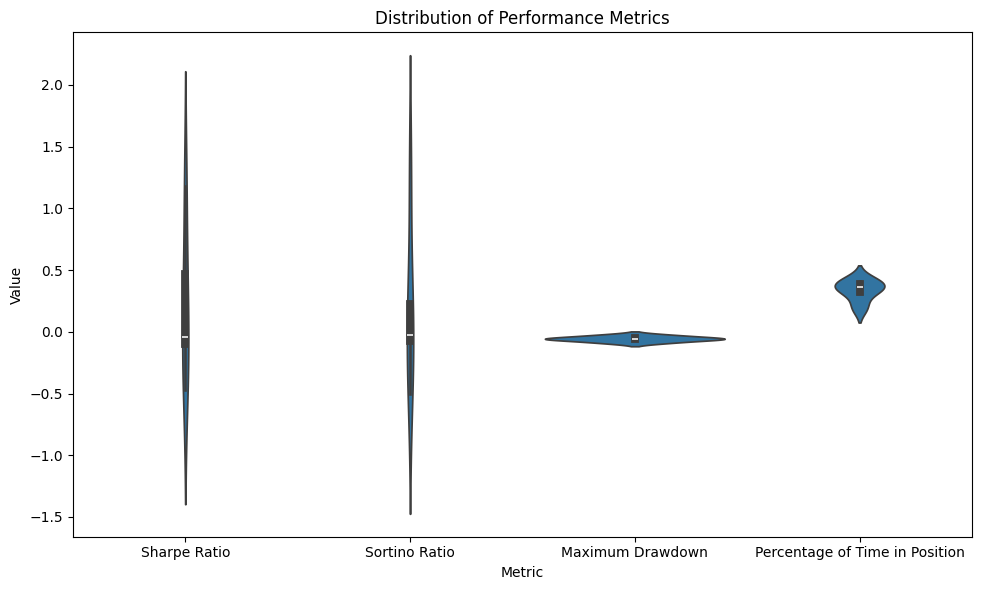

In [52]:
# performance for Optics
df = plot_performance_distribution(hw_model(price_test,O_shared))
df.to_clipboard()

In [81]:
check_pairs(sample_pairs, stock_info)

,Pair,Same_Company_Name,Same_NAICS
0,"(11674, 23229)",False,221118.0
1,"(11674, 23931)",False,221118.0
2,"(11674, 24985)",False,221118.0
3,"(23229, 23536)",False,221118.0
4,"(23229, 23931)",False,221118.0
...,...,...,...
61,"(64995, 69032)",False,NaN
62,"(48725, 62148)",False,482111.0
63,"(48725, 64311)",False,482111.0
64,"(62148, 64311)",False,482111.0


In [73]:
# percentage of pairs out of industry

final_results = []

for algorithm in ['OPTICS', 'HDBSCAN', 'DBSCAN']:
    for relationship in ['Cointegration', 'Correlation']:
        key = f"{algorithm}_{relationship}"
        sample_pairs = data[key]
        
        # Check pairs and calculate the percentage of pairs not in the same industry
        result_df = check_pairs(sample_pairs, stock_info)
        different_industry_percentage = calculate_different_industry_percentage(result_df)
        
        final_results.append({
            'Clustering': algorithm,
            'Test': relationship,
            'Different_Industry_Percentage': different_industry_percentage
        })

# Create the final dataframe
final_df = pd.DataFrame(final_results)

print(final_df)

  Clustering           Test  Different_Industry_Percentage
0     OPTICS  Cointegration                      25.000000
1     OPTICS    Correlation                       0.000000
2    HDBSCAN  Cointegration                      36.363636
3    HDBSCAN    Correlation                      20.833333
4     DBSCAN  Cointegration                      45.000000
5     DBSCAN    Correlation                      21.212121


In [74]:
final_df.to_clipboard()

In [102]:
naics_df = pd.read_csv("/Users/caleb/Library/CloudStorage/OneDrive-Personal/文档/Curriculum/NYU Y1S2/Robo/project/naics.csv")

import pandas as pd

def get_industry_pair_value_counts(data, stock_info, naics_df):
    """
    Calculate the value count of industry pairs, aggregated across clustering methods and tests.

    Args:
        data (dict): A dictionary containing sample pairs for each combination of clustering algorithm and relationship type.
        stock_info (pandas.DataFrame): A DataFrame containing stock information with columns 'PERMNO', 'Company Name', and 'North American Industry Classification System'.
        naics_df (pandas.DataFrame): A DataFrame containing NAICS codes and their corresponding industry names, with columns 'code', 'name', 'level', and 'notes'.

    Returns:
        pandas.DataFrame: A DataFrame with columns 'Industry_1', 'Industry_2', and 'Value_Count'.
    """
    # Filter naics_df to include only rows where level equals 4
    naics_df = naics_df[naics_df['level'] == 4]
    
    final_results = []

    for algorithm in ['OPTICS', 'HDBSCAN', 'DBSCAN']:
        for relationship in ['Cointegration']:
            key = f"{algorithm}_{relationship}"
            sample_pairs = data[key]
            
            industry_pairs = []
            for pair in sample_pairs:
                permno1, permno2 = pair
                industry1 = int(str(stock_info.loc[stock_info['PERMNO'] == permno1, 'North American Industry Classification System'].values[0])[:4])
                industry2 = int(str(stock_info.loc[stock_info['PERMNO'] == permno2, 'North American Industry Classification System'].values[0])[:4])
                industry_pairs.append((industry1, industry2))
            
            # Create a DataFrame with industry pairs
            industry_pairs_df = pd.DataFrame(industry_pairs, columns=['Industry_1', 'Industry_2'])
            
            # Merge with naics_df to get industry names
            industry_pairs_df = pd.merge(industry_pairs_df, naics_df, left_on='Industry_1', right_on='code', how='left')
            industry_pairs_df = pd.merge(industry_pairs_df, naics_df, left_on='Industry_2', right_on='code', how='left')
            industry_pairs_df.rename(columns={'name_x': 'Industry_Name_1', 'name_y': 'Industry_Name_2'}, inplace=True)
            
            # Calculate the value count of industry pairs
            value_counts = industry_pairs_df.groupby(['Industry_Name_1', 'Industry_Name_2']).size().reset_index(name='Value_Count')
            
            # Append the results to the final_results list
            final_results.append(value_counts)

    # Concatenate the final_results into a single DataFrame
    final_df = pd.concat(final_results, ignore_index=True)

    # Aggregate the results by summing the value counts for each industry pair
    aggregated_df = final_df.groupby(['Industry_Name_1', 'Industry_Name_2'], as_index=False)['Value_Count'].sum()

    return aggregated_df

industry_pair_value_counts_df = get_industry_pair_value_counts(data, stock_info, naics_df)
print(industry_pair_value_counts_df)

                                     Industry_Name_1  \
0                   Depository Credit Intermediation   
1                   Depository Credit Intermediation   
2                   Depository Credit Intermediation   
3                   Depository Credit Intermediation   
4  Electric Power Generation, Transmission and Di...   
5  Electric Power Generation, Transmission and Di...   
6                                 Insurance Carriers   
7                  Other Miscellaneous Manufacturing   
8                  Residential Building Construction   

                                     Industry_Name_2  Value_Count  
0                   Depository Credit Intermediation            7  
1                                 Insurance Carriers            1  
2            Management of Companies and Enterprises            3  
3  Securities and Commodity Contracts Intermediat...            1  
4  Electric Power Generation, Transmission and Di...           13  
5                           Nat

In [103]:
industry_pair_value_counts_df.to_clipboard()

In [95]:
naics_df.columns

Index(['level', 'code', 'name', 'notes'], dtype='object')

## Trade execution

In [11]:
from statsmodels.tsa.stattools import adfuller

def calculate_spread(data0, data1):
    """
    Calculate the spread between two price series based on the cointegration assumption.

    Parameters:
        data0 (pd.Series): Price series of the first asset.
        data1 (pd.Series): Price series of the second asset.

    Returns:
        spread (pd.Series): The calculated spread series with zero mean.
        beta (float): The cointegration coefficient.
    """
    # Perform the Augmented Dickey-Fuller test for cointegration
    residuals = data0 - data1
    adf_result = adfuller(residuals)
    pvalue = adf_result[1]

    # Check if the p-value is below the significance level (e.g., 0.05)
    if pvalue < 0.05:
        # Estimate the cointegration coefficient using OLS regression
        beta = np.polyfit(data1, data0, deg=1)[0]
        spread = data0 - beta * data1
    else:
        # If the series are not cointegrated, use a simple spread calculation
        spread = data0 - data1
        beta = 1

    # Subtract the mean of the spread to obtain a zero-mean series
    spread = spread - spread.mean()

    return spread, beta

Error


<Axes: >

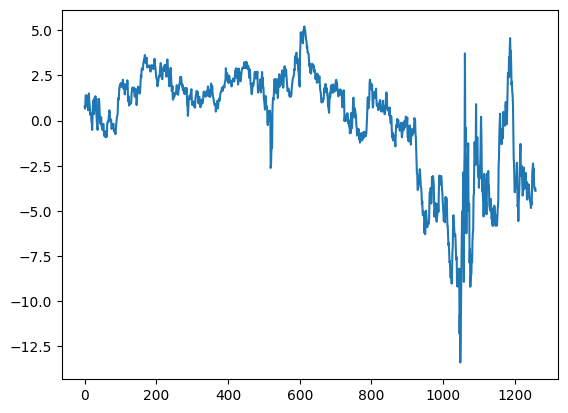

In [18]:
pair = [23931, 44206]

df1 = all_stock_price.loc[all_stock_price.PERMNO==pair[0],["PRC",'date']].reset_index(drop=True)
df2 = all_stock_price.loc[all_stock_price.PERMNO==pair[1],["PRC",'date']].reset_index(drop=True)

# merged_df = pd.merge(df1,df2,on='date', how='outer')

calculate_spread(df1['PRC'],df2['PRC']).plot()


In [ ]:
class PairTradingStrategy(bt.Strategy):
    params = (
        ('model', None),
        ('long_percentile', 80),
        ('short_percentile', 20),
        ('max_holding_period', 50),  # Maximum holding period in terms of data points
    )

    def __init__(self):
        self.spread, self.beta = calculate_spread(self.data0.close, self.data1.close)
        self.holding_period = 0
        self.prev_predicted_change = None
        self.long_threshold = None
        self.short_threshold = None
        self.spread_changes = []

    def next(self):
        current_spread = self.spread[0]
        prev_spread = self.spread[-1]
        spread_change = (current_spread - prev_spread) / prev_spread

        predicted_change = generate_predicted_spread_change(self.params.model, current_spread)

        if self.position:
            self.holding_period += 1

            if self.position.size > 0:  # Long position
                if current_spread <= 0 or predicted_change < 0 or self.holding_period >= self.params.max_holding_period:
                    self.close()
                    self.holding_period = 0
                    self.prev_predicted_change = None
            elif self.position.size < 0:  # Short position
                if current_spread >= 0 or predicted_change > 0 or self.holding_period >= self.params.max_holding_period:
                    self.close()
                    self.holding_period = 0
                    self.prev_predicted_change = None
        else:
            self.calculate_thresholds(spread_change)

            if predicted_change > self.long_threshold and (self.prev_predicted_change is None or predicted_change > self.prev_predicted_change):
                self.buy(size=1)
                self.holding_period = 0
                self.prev_predicted_change = predicted_change
            elif predicted_change < self.short_threshold and (self.prev_predicted_change is None or predicted_change < self.prev_predicted_change):
                self.sell(size=1)
                self.holding_period = 0
                self.prev_predicted_change = predicted_change

    def calculate_thresholds(self, spread_change):
        self.spread_changes.append(spread_change)

        if len(self.spread_changes) > 0:
            long_percentile = np.percentile(self.spread_changes, self.params.long_percentile)
            short_percentile = np.percentile(self.spread_changes, self.params.short_percentile)
            self.long_threshold = max(self.long_threshold or long_percentile, long_percentile)
            self.short_threshold = min(self.short_threshold or short_percentile, short_percentile)

## Trade execution based on predicted spread

In [13]:
pip install convert_to_numpy

ERROR: Could not find a version that satisfies the requirement convert_to_numpy (from versions: none)
ERROR: No matching distribution found for convert_to_numpy
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd

def calculate_returns_new(df, days):
    """Calculate percentage returns over specified number of days."""
    return df['PRC'].pct_change(days)

def calculate_z_scores_new(df):
    """Calculate rolling z-scores of returns over specified window."""
    return df / df.rolling(window=60).std().shift(1)

def analyze_permno_pairs(df, permno1, permno2, days):
    """
    Analyze two PERMNOs in the DataFrame, calculating returns, z-scores, and differences of z-scores.

    Parameters:
    df (pd.DataFrame): Input DataFrame with columns 'PERMNO' and 'PRC'.
    permno1 (int): First PERMNO identifier.
    permno2 (int): Second PERMNO identifier.
    days (int): Number of days for calculating returns.

    Returns:
    pd.DataFrame: DataFrame with the calculated metrics.
    """
    # Filter data for each PERMNO
    df1 = df[df['PERMNO'] == permno1].copy()
    df2 = df[df['PERMNO'] == permno2].copy()

    # Calculate returns for each PERMNO
    df1.loc[:, 'ret_1'] = calculate_returns_new(df1, days)
    df2.loc[:, 'ret_2'] = calculate_returns_new(df2, days)

    # Calculate z-scores for each PERMNO's returns
    df1.loc[:, 'z_1'] = calculate_z_scores_new(df1['ret_1'])
    df2.loc[:, 'z_2'] = calculate_z_scores_new(df2['ret_2'])

    # Ensure that both data frames are aligned by date before merging
    df1 = df1.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)

    # Create a DataFrame to store the results
    result_df = pd.DataFrame({
        'date': pd.to_datetime(df1['date']),  # Assuming 'date' column exists and is common
        'ret_1': df1['ret_1'],
        'ret_2': df2['ret_2'],
        'z_1': df1['z_1'],
        'z_2': df2['z_2']
    })

    # Calculate the difference between z-scores
    result_df['zret_days'] = result_df['z_1'] - result_df['z_2']

    return result_df

def create_lookback_features_new(dataset, look_back):
    """Generate features and labels from the dataset."""
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


# Example Usage
#Assuming 'df' is your DataFrame containing the data including 'PERMNO', 'PRC', and 'date'
results = analyze_permno_pairs(price_test, 10104, 10107, 5)
print(results.tail())

          date     ret_1     ret_2       z_1       z_2  zret_days
248 2020-12-24  0.021223  0.015176  0.701482  0.411558   0.289924
249 2020-12-28 -0.002920  0.029141 -0.096384  0.798760  -0.895144
250 2020-12-29 -0.000310  0.007008 -0.010227  0.193375  -0.203601
251 2020-12-30 -0.011512 -0.010092 -0.381342 -0.278803  -0.102538
252 2020-12-31 -0.009342  0.006334 -0.308570  0.174701  -0.483271


In [85]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

def train_and_forecast(price_train, price_test, look_back=3, epochs=10):
    """ Train the LSTM model on price_train and forecast using price_test. """
    # Prepare training data
    train_X, train_y = create_lookback_features(price_train['zret_days'].values.reshape(-1,1), look_back)

    # Reshape input for LSTM [samples, time steps, features]
    train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))

    # Define LSTM model
    model = Sequential([
        LSTM(50, input_shape=(look_back, 1)),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=1, verbose=0)

    # Prepare test data (to forecast 2021)
    test_X, _ = create_lookback_features(price_test['zret_days'].values.reshape(-1,1), look_back)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))

    # Forecast future values
    predictions = model.predict(test_X)
    # Assuming price_test includes a 'date' column that correctly indexes days
# Aligning dates correctly for plotting
    actual_dates = price_test['date'].iloc[look_back:]  # Skip the first 'look_back' days
    predicted_dates = actual_dates  # Predictions correspond to the actual dates after look_back

    # plt.figure(figsize=(15, 7))
    # plt.plot(actual_dates, price_test['zret_days'].iloc[look_back:], label='Actual ZDiff', color='blue')
    # plt.plot(predicted_dates, predictions.flatten(), label='Predicted ZDiff', color='orange', alpha=0.7)
    # plt.title('Actual vs Predicted ZDiffs for 2021')
    # plt.xlabel('Date')
    # plt.ylabel('Zdiff')
    # plt.legend()
    # plt.show()


    return predictions

# predictions = train_and_forecast(new_price_train, new_price_test, look_back=3, epochs=10)


In [86]:
import pandas as pd
import numpy as np

def join_and_predict_new(df1, df2, permno1, permno2, days, look_back=3, epochs=10):
    """
    This function joins two stocks using their PERMNO identifiers, calculates the actual and predicted z-scores difference,
    and returns a DataFrame with these values.
    """
    # Extract and preprocess data using analyze_permno_pairs function
    to_train = analyze_permno_pairs(df1, permno1, permno2, days)
    to_train = to_train.dropna()
    to_test = analyze_permno_pairs(df2, permno1, permno2, days)
    to_test = to_test.dropna()

    # Predict the spread using the LSTM model
    predicted_spread = train_and_forecast(to_train, to_test, look_back=look_back, epochs=epochs)

    # Convert predicted_spread to a NumPy array if it's a list
    if isinstance(predicted_spread, list):
        predicted_spread = np.array(predicted_spread)

    # Ensure predicted_spread is a 1-dimensional array
    if predicted_spread.ndim != 1:
        predicted_spread = predicted_spread.flatten()  # Flatten if necessary

    # Adjust the dates to match the predicted spread length
    # Use the dates up to the second-to-last date in the test data
    aligned_dates = to_test['date'].iloc[look_back:-1].reset_index(drop=True)

    # Create a final DataFrame to return
    result_df = pd.DataFrame({
        'date': aligned_dates,  # Dates aligned with the predictions
        'PERMNO1': np.repeat(permno1, len(aligned_dates)),
        'PERMNO2': np.repeat(permno2, len(aligned_dates)),
        f'zdiff{days}': predicted_spread[1:]  # Use predictions starting from the second element
    })

    return result_df

In [87]:
def predicted_spread_model(all_stock_price, sample_pair):
    metrics_dfs = []
    
    # Process each pair of companies
    for pair in sample_pair:
        df1 = all_stock_price.loc[all_stock_price.PERMNO==pair[0],["PRC",'date']].reset_index(drop=True)
        df2 = all_stock_price.loc[all_stock_price.PERMNO==pair[1],["PRC",'date']].reset_index(drop=True)
        company1 = all_stock_price.loc[all_stock_price.PERMNO==pair[0],"TICKER"].iloc[0]
        company2 = all_stock_price.loc[all_stock_price.PERMNO==pair[1],"TICKER"].iloc[0]
        
        # Calculate ret1 for both companies
        df1['ret1'] = calculate_returns(df1[["PRC"]], 1)
        df2['ret1'] = calculate_returns(df2[["PRC"]], 1)
        
        df1['vol20'] = calculate_volatility(df1)
        df2['vol20'] = calculate_volatility(df2)
    

        # get predicted spread
        merged_spread_df = None
        for window in [5, 10, 20]:
            spread_df = join_and_predict_new(price_train, price_test, pair[0],pair[1], window, look_back=20, epochs=15)
            
            if merged_spread_df is None:
                merged_spread_df = spread_df
            else:
                merged_spread_df = pd.merge(merged_spread_df, spread_df, on='date',how="left")

        # Filter out the useful columns
        useful_columns = ['date'] + [f'zdiff{window}' for window in [5, 10, 20]]
        merged_spread_df = merged_spread_df[useful_columns]

        # merged_spread_df.head()        
        
        
        # Merge dataframes
        merged_df = pd.merge(df1, df2, on='date', how='outer')

        merged_df = pd.merge(merged_df, merged_spread_df, on='date', how='left')

        # Trading signals and position management
        for days, zdiff, hold_period in [('5', 'zdiff5', 5), ('10', 'zdiff10', 10), ('20', 'zdiff20', 20)]:
            # Calculate signals based on zdiff{5,10,20} returned by predict_spread
            merged_df[f'signal{days}'] = np.where(merged_df[zdiff] < LongEntryThreshold, 1,
                                                  np.where(merged_df[zdiff] > ShortEntryThreshold, -1, 0))
            
            merged_df[f'LCap{days}'] = np.where((merged_df[f'signal{days}'].shift(1) == 1) & (merged_df[zdiff] > LongCap), 1, 0)
            merged_df[f'SCap{days}'] = np.where((merged_df[f'signal{days}'].shift(1) == -1) & (merged_df[zdiff] < ShortCap), 1, 0)
        
        merged_df = generate_age_and_position_columns(merged_df)

        for days, zdiff, hold_period in [('5', 'zdiff5', 5), ('10', 'zdiff10', 10), ('20', 'zdiff20', 20)]:

            # merged_df[f'age{days}'] = (merged_df[f'signal{days}'] != 0).astype(int).cumsum()
            # merged_df[f'aged{days}?'] = (merged_df[f'age{days}'] == hold_period).astype(int)

            # position should be 
            # merged_df[f'position{days}'] = np.where(merged_df[f'aged{days}?'] == 1, 0, merged_df[f'signal{days}'])
            merged_df[f'fret_z{days}'] = merged_df[f'position{days}'] * merged_df[f'ret1_x'].shift(-1) - merged_df[f'position{days}'] * merged_df[f'ret1_y'].shift(-1)    
                
        
        merged_df["ComboRet"] = (merged_df['fret_z5'] + merged_df['fret_z10'] + merged_df['fret_z20']) / 3
        metrics_df = calculate_metrics(merged_df, company1, company2)
        metrics_dfs.append(metrics_df)
    
    all_metrics_df = pd.concat(metrics_dfs, ignore_index=True)
    return all_metrics_df

### test run

In [42]:
sample_pair_HDBSCAN_CORRELATION=[(11674, 23229),
(11674, 23931),
(11674, 24985),
(23229, 23536),
(23229, 23931),
(23229, 24010),
(23229, 24109),
(23229, 24205),
(23229, 24985),
(23229, 44206),
(23536, 23931),
(23536, 24010),
(23536, 24109),
(23536, 44206),
(23931, 24010),
(23931, 24109),
(23931, 24205),
(23931, 24985),
(23931, 44206),
(24010, 24109),
(24010, 44206),
(24109, 24985),
(24109, 44206),
(24205, 24985)]
sample_pair_HDBSCAN_COINTEGRATION=([23229, 24109],
 [23931, 44206],
 [23536, 24010],
 [27959, 38762],
 [23229, 44206],
 [23931, 24109],
 [24109, 44206],
 [23536, 44206],
 [11404, 38762],
 [21776, 23712],
 [21792, 27991])
sample_pair_DBSCAN_COINTEGRATION=([42906, 58246],
 [25953, 56573],
 [23229, 24109],
 [58246, 71563],
 [35554, 58246],
 [23931, 44206],
 [54148, 77661],
 [71563, 81055],
 [70519, 79323],
 [60442, 70519],
 [23536, 24010],
 [62308, 79323],
 [35554, 42906],
 [34746, 58246],
 [42906, 81055],
 [27959, 38762],
 [58246, 81055],
 [64995, 69032],
 [23229, 44206],
 [23931, 24109])

sample_pair_DBSCAN_CORR= [(11674, 23229),
(11674, 23931),
(11674, 24985),
(23229, 23536),
(23229, 23931),
(23229, 24010),
(23229, 24109),
(23229, 24205),
(23229, 24985),
(23229, 44206),
(23536, 23931),
(23536, 24010),
(23536, 24109),
(23536, 44206),
(23931, 24010),
(23931, 24109),
(23931, 24205),
(23931, 24985),
(23931, 44206),
(24010, 24109),
(24010, 44206),
(24109, 24985),
(24109, 44206),
(24205, 24985),
(25081, 35044),
(25081, 35554),
(34746, 35044),
(34746, 35554),
(34746, 42906),
(34746, 58246),
(34746, 60442),
(34746, 64995),
(34746, 69032),
(34746, 71563),
(35044, 35554),
(35044, 42906),
(35044, 58246),
(35044, 60442),
(35044, 64995),
(35044, 69032),
(35044, 71563),
(35554, 42906),
(35554, 64995),
(35554, 69032),
(42906, 58246),
(42906, 60442),
(42906, 64995),
(42906, 71563),
(42906, 81055),
(47896, 59408),
(47896, 62308),
(47896, 71563),
(58246, 60442),
(58246, 64995),
(59408, 60442),
(59408, 62308),
(59408, 71563),
(60442, 69032),
(60442, 70519),
(60442, 71563),
(62308, 79323),
(64995, 69032),
(48725, 62148),
(48725, 64311),
(62148, 64311),
(54148, 77661)]



In [ ]:
outcome_df = predicted_value_model(price_test,sample_pair_HDBSCAN_COINTEGRATION)
plot_performance_distribution(outcome_df)

### HDBSCAN_CORRELATION

In [100]:
outcome_df = predicted_value_model(price_test,sample_pair_HDBSCAN_CORRELATION)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


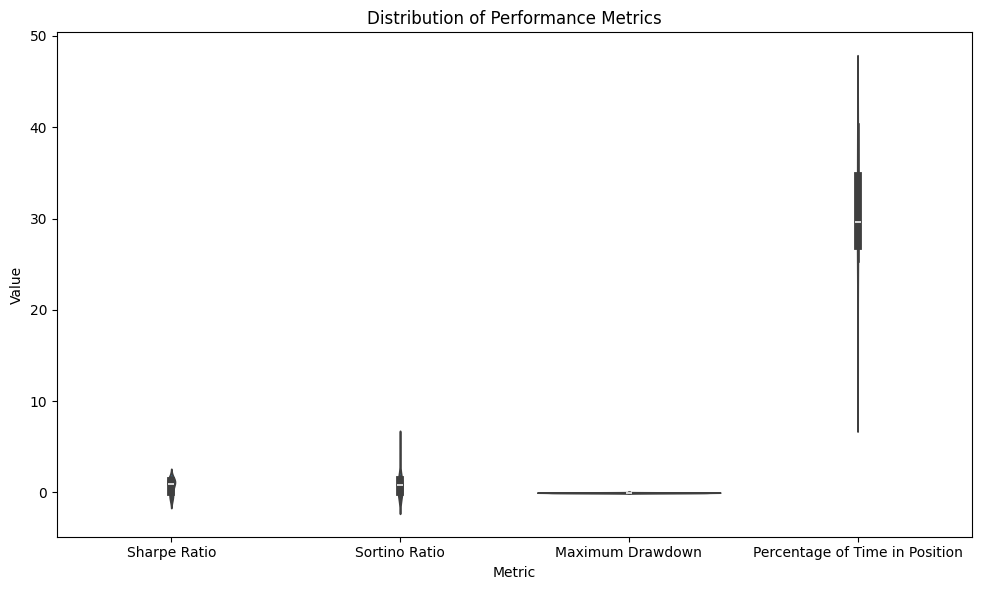

,count,mean,std,min,25%,50%,75%,max
Metric,,,,,,,,
Maximum Drawdown,24.0,-0.046535,0.025670,-0.094344,-0.068353,-0.046685,-0.022142,-0.009874
Percentage of Time in Position,24.0,29.430171,7.142238,14.229249,26.976285,29.644269,34.683794,40.316206
Sharpe Ratio,24.0,0.643467,0.788324,-0.879513,0.033177,0.933298,1.234820,1.739062
Sortino Ratio,24.0,0.886354,1.378558,-0.885686,0.049819,0.754533,1.341681,5.282113


In [102]:
plot_performance_distribution(outcome_df)

In [101]:
outcome_df

,Company1,Company2,Sharpe Ratio,Sortino Ratio,Maximum Drawdown,Percentage of Time in Position
0,DTE,CMS,-0.567019,-0.523309,-0.075983,34.387352
1,DTE,XEL,0.079743,0.089472,-0.094344,25.296443
2,DTE,AEE,1.163333,1.081095,-0.070528,36.758893
3,CMS,WEC,1.226319,0.674574,-0.009874,14.229249
4,CMS,XEL,1.507659,1.617269,-0.016658,27.272727
5,CMS,ETR,1.116919,0.834492,-0.024501,26.086957
6,CMS,AEP,0.566496,0.306840,-0.021813,27.272727
7,CMS,NEE,0.634797,0.650745,-0.045101,39.525692
8,CMS,AEE,1.739062,1.787094,-0.017249,30.039526
9,CMS,ES,0.296888,0.123289,-0.060772,15.415020


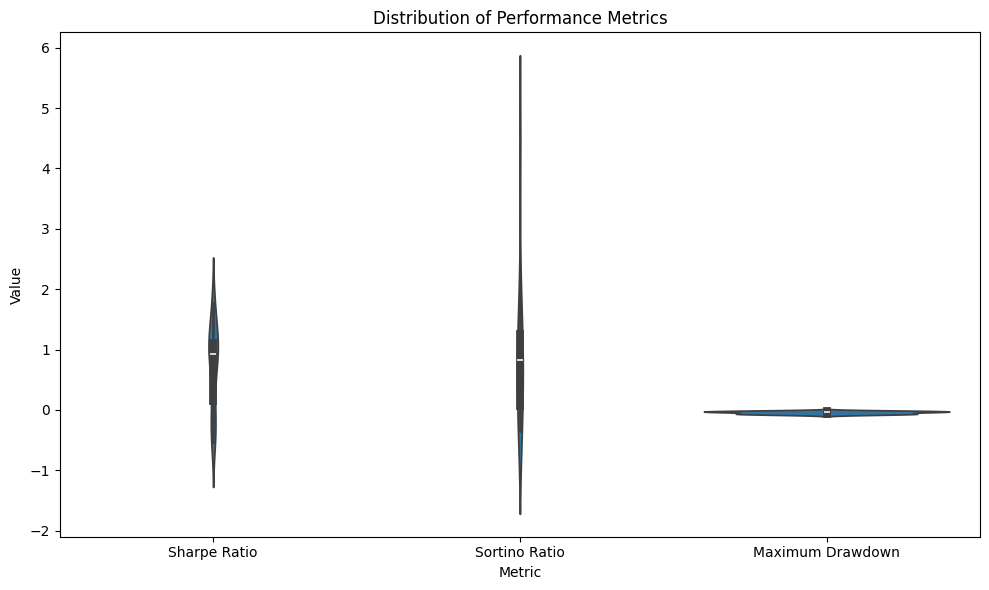

,count,mean,std,min,25%,50%,75%,max
Metric,,,,,,,,
Maximum Drawdown,24.0,-0.043665,0.022772,-0.084287,-0.063802,-0.036709,-0.024007,-0.009874
Sharpe Ratio,24.0,0.710368,0.707917,-0.527391,0.150170,0.922185,1.109274,1.775475
Sortino Ratio,24.0,0.958060,1.295451,-0.350333,0.068599,0.826269,1.259039,4.504062


In [90]:
plot_performance_distribution(outcome_df)

### HDBSCAN_COINTEGRATION

In [94]:
outcome_df_HCoin = predicted_value_model(price_test,sample_pair_HDBSCAN_COINTEGRATION)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


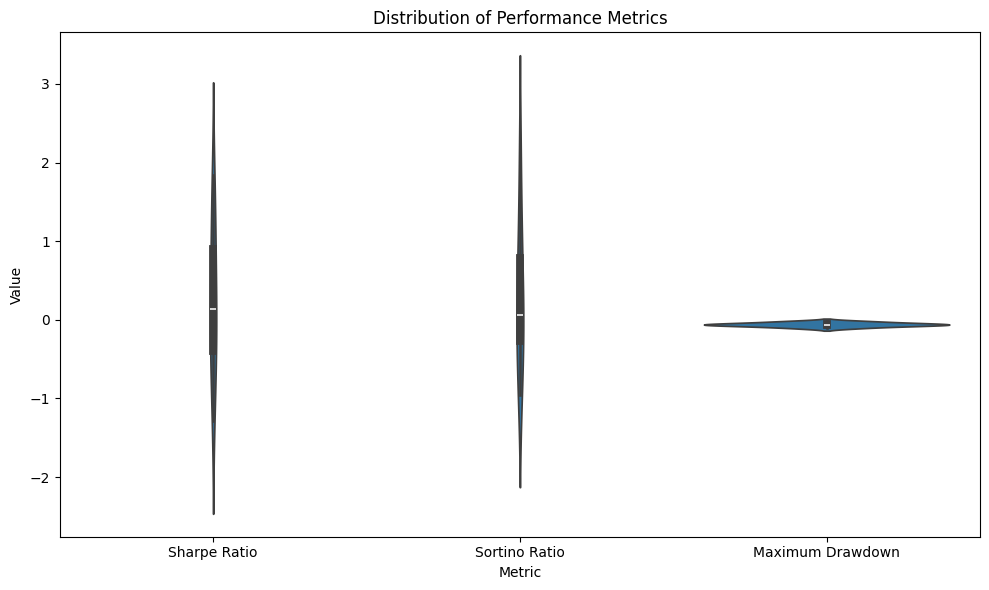

,count,mean,std,min,25%,50%,75%,max
Metric,,,,,,,,
Maximum Drawdown,11.0,-0.059697,0.025885,-0.105988,-0.071935,-0.060772,-0.048617,-0.016466
Sharpe Ratio,11.0,0.243747,0.948500,-1.292568,-0.394767,0.135400,0.905828,1.845555
Sortino Ratio,11.0,0.277836,0.949478,-0.952622,-0.270689,0.066705,0.783498,2.188940


In [95]:
outcome_df_HCoin
plot_performance_distribution(outcome_df_HCoin)

### DBSCAN_Corr

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


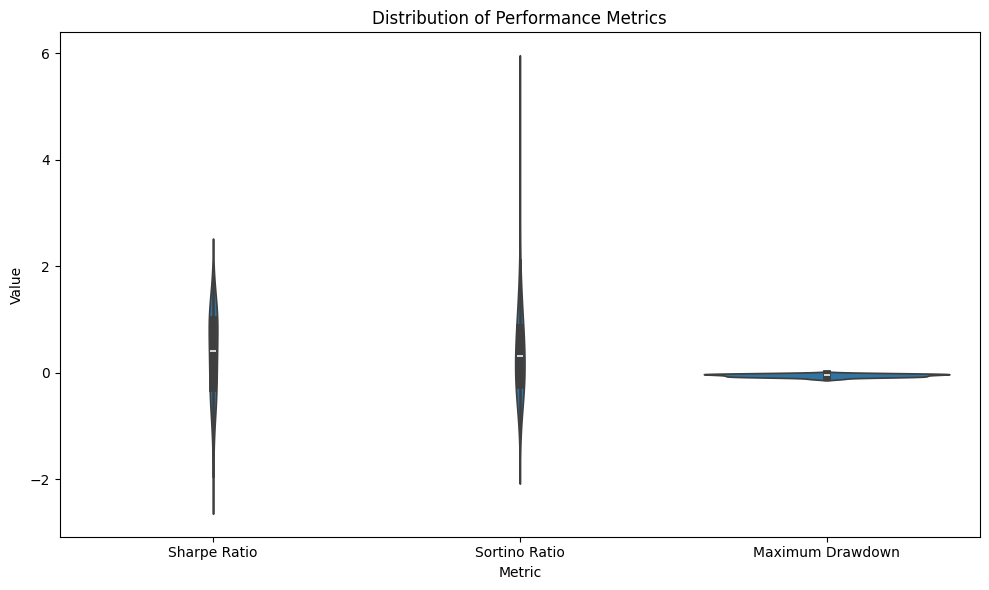

,count,mean,std,min,25%,50%,75%,max
Metric,,,,,,,,
Maximum Drawdown,66.0,-0.052707,0.029074,-0.120814,-0.076729,-0.050544,-0.028680,-0.004871
Sharpe Ratio,66.0,0.328800,0.816303,-1.944723,-0.295488,0.398151,0.986479,1.810104
Sortino Ratio,66.0,0.475277,1.043649,-1.181600,-0.228116,0.305218,0.833138,5.055405


In [96]:
outcome_df_DCorr = predicted_value_model(price_test,sample_pair_DBSCAN_CORR)
plot_performance_distr ibution(outcome_df_DCorr)